In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [ ]:
# Loads data
data_url = "https://data.cdc.gov/api/views/8pt5-q6wp/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(data_url)

In [ ]:
'''
Notes for the HDAG project:

"Value" is the percentage of adults who report symptoms of anxiety or depression  

For this project, we will ignore the confidence interval and just use the value

The data includes weekly values over months --> do a few graphs on a certain demographic over time 
and then probably start averaging data for broad comparisons

In 2019, 8.1% of adults aged 18 and over had symptoms of anxiety disorder, 6.5% had symptoms of depressive disorder,
 and 10.8% had symptoms of anxiety disorder or depressive disorder. --> so everything is really high in comparison for this panedmic dataset
'''

'\nNotes for the HDAG project:\n\n"Value" is the percentage of adults who report symptoms of anxiety or depression  \n\nFor this project, we will ignore the confidence interval and just use the value\n\nThe data includes weekly values over months --> do a few graphs on a certain demographic over time \nand then probably start averaging data for broad comparisons\n\nIn 2019, 8.1% of adults aged 18 and over had symptoms of anxiety disorder, 6.5% had symptoms of depressive disorder,\n and 10.8% had symptoms of anxiety disorder or depressive disorder. --> so everything is really high in comparison for this panedmic dataset\n'

In [ ]:
# split into smaller datasets
dep_data = data[data["Indicator"] == "Symptoms of Depressive Disorder"]
anx_data = data[data["Indicator"] == "Symptoms of Anxiety Disorder"]

In [ ]:
# function to calculate the mean percentage throughout entire time period for a specific subgroup

def find_subgroup_mean(data, subgroup_name):
  subset_data = data[data["Subgroup"] == subgroup_name]
  mean = round(subset_data["Value"].mean(), 2)
  return mean

  

In [ ]:
data.iloc[:,3].unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

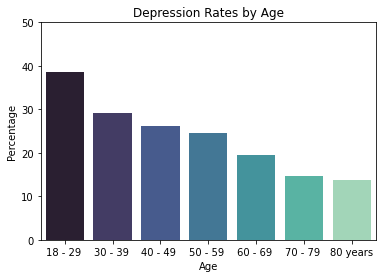

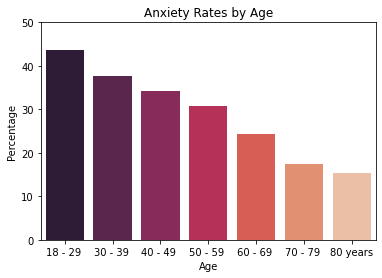

In [ ]:
# First figures: General Comparison between age groups for anxiety and depressive disorder
age_ranges = ['18 - 29 years', '30 - 39 years', '40 - 49 years','50 - 59 years', '60 - 69 years', '70 - 79 years', '80 years and above']

# Generate graph for depression
depression_by_age = []

for age in age_ranges:
  value = find_subgroup_mean(dep_data, age)
  # I sliced the age to make it easier to fit the name, sloppy
  depression_by_age.append([age[:8], value ])

depression_age_df = pd.DataFrame(depression_by_age,columns=['Age','Percentage'])

sns.barplot(x = "Age", y = "Percentage", data = depression_age_df, palette="mako").set_title("Depression Rates by Age")
plt.ylim(0, 50)
plt.show()

# Generate graph for anxiety
anxiety_by_age = []

for age in age_ranges:
  value = find_subgroup_mean(anx_data, age)
  anxiety_by_age.append([age[:8], value ])

anxiety_age_df = pd.DataFrame(anxiety_by_age,columns=['Age','Percentage'])

sns.barplot(x = "Age", y = "Percentage", data = anxiety_age_df, palette="rocket").set_title("Anxiety Rates by Age")
plt.ylim(0, 50)
plt.show()

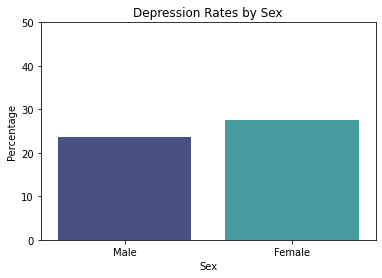

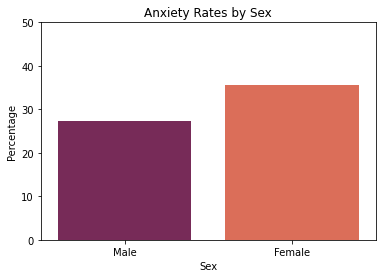

In [ ]:
# Second figures: General Comparison between sex for anxiety and depressive disorder

# Generate graphs for depression
depression_by_sex = []

depression_by_sex.append(["Male", find_subgroup_mean(dep_data, "Male")])
depression_by_sex.append(["Female", find_subgroup_mean(dep_data, "Female")])

depression_sex_df = pd.DataFrame(depression_by_sex,columns=['Sex','Percentage'])

sns.barplot(x = "Sex", y = "Percentage", data = depression_sex_df, palette="mako").set_title("Depression Rates by Sex")
plt.ylim(0, 50)
plt.show()


# Generate graphs for anxiety
anxiety_by_sex = []

anxiety_by_sex.append(["Male", find_subgroup_mean(anx_data, "Male")])
anxiety_by_sex.append(["Female", find_subgroup_mean(anx_data, "Female")])

anxiety_sex_df = pd.DataFrame(anxiety_by_sex,columns=['Sex','Percentage'])

sns.barplot(x = "Sex", y = "Percentage", data = anxiety_sex_df, palette="rocket").set_title("Anxiety Rates by Sex")
plt.ylim(0, 50)
plt.show()

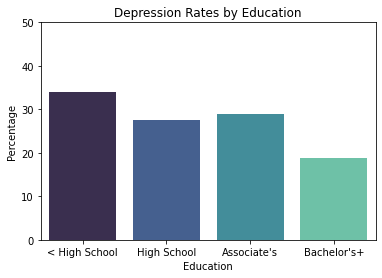

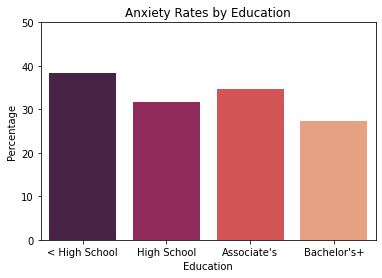

In [ ]:
# Third figures: General Comparison between education level for anxiety and depressive disorder
edu_ranges = ['Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher"]

# Generate graph for depression
depression_by_edu = []

for edu in edu_ranges:
  value = find_subgroup_mean(dep_data, edu)
  depression_by_edu.append([edu, value ])

depression_edu_df = pd.DataFrame(depression_by_edu,columns=['Education','Percentage'])
depression_edu_df["Education"] = ["< High School", "High School", "Associate's", "Bachelor's+"]

sns.barplot(x = "Education", y = "Percentage", data = depression_edu_df, palette="mako").set_title("Depression Rates by Education")
plt.ylim(0, 50)
plt.show()

# Generate graph for anxiety
anxiety_by_edu = []

for edu in edu_ranges:
  value = find_subgroup_mean(anx_data, edu)
  anxiety_by_edu.append([edu, value ])

anxiety_edu_df = pd.DataFrame(anxiety_by_edu,columns=['Education','Percentage'])
anxiety_edu_df["Education"] = ["< High School", "High School", "Associate's", "Bachelor's+"]

sns.barplot(x = "Education", y = "Percentage", data = anxiety_edu_df, palette="rocket").set_title("Anxiety Rates by Education")
plt.ylim(0, 50)
plt.show()

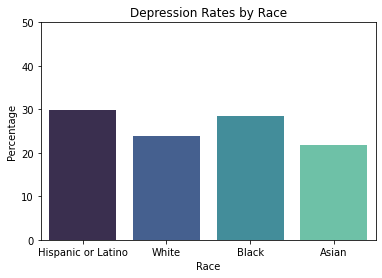

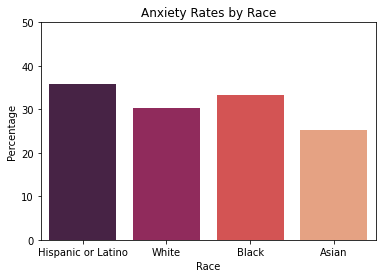

In [ ]:
# Fourth figures: General Comparison between Race for anxiety and depressive disorder
race_ranges = ['Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race']

# Generate graph for depression
depression_by_race = []

for race in race_ranges:
  value = find_subgroup_mean(dep_data, race)
  depression_by_race.append([race, value ])

depression_race_df = pd.DataFrame(depression_by_race,columns=['Race','Percentage'])
depression_race_df["Race"] = ['Hispanic or Latino',
       'White',
       'Black',
       'Asian']

sns.barplot(x = "Race", y = "Percentage", data = depression_race_df, palette="mako").set_title("Depression Rates by Race")
plt.ylim(0, 50)
plt.show()

# Generate graph for anxiety
anxiety_by_race = []

for race in race_ranges:
  value = find_subgroup_mean(anx_data, race)
  anxiety_by_race.append([race, value ])

anxiety_race_df = pd.DataFrame(anxiety_by_race,columns=['Race','Percentage'])
anxiety_race_df["Race"] = ['Hispanic or Latino',
       'White',
       'Black',
       'Asian']
sns.barplot(x = "Race", y = "Percentage", data = anxiety_race_df, palette="rocket").set_title("Anxiety Rates by Race")
plt.ylim(0, 50)
plt.show()

In [ ]:
all_subgroups = ['18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher"]

depression_all = []
for sub in all_subgroups:
  value_dep = find_subgroup_mean(dep_data, sub)
  value_anx = find_subgroup_mean(anx_data, sub)

  depression_all.append([sub, value_dep, value_anx ])

depression_all_df = pd.DataFrame(depression_all,columns=['subgroup','Depression %', 'Anxiety %'])

In [ ]:
depression_all_df

,subgroup,Depression %,Anxiety %
0,18 - 29 years,38.50,43.65
1,30 - 39 years,29.18,37.58
2,40 - 49 years,26.20,34.29
3,50 - 59 years,24.51,30.88
4,60 - 69 years,19.51,24.24
5,70 - 79 years,14.74,17.48
6,80 years and above,13.76,15.36
7,Male,23.59,27.43
8,Female,27.49,35.61
9,Hispanic or Latino,29.85,35.88


In [ ]:
states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", 
       "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia",
       "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky",
       "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan",
       "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina",
       "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico",
       "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
       "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
       "Utah", "Virginia", "Vermont", "Washington", "Wisconsin",
       "West Virginia", "Wyoming"]

data_by_state = []
for sub in states:
  value_dep = find_subgroup_mean(dep_data, sub)
  value_anx = find_subgroup_mean(anx_data, sub)

  data_by_state.append([sub, value_dep, value_anx ])

data_by_state_df = pd.DataFrame(data_by_state,columns=['subgroup','Depression %', 'Anxiety %'])
data_by_state_df.insert(0, 'id', range(1, 1 + len(data_by_state_df)))

data_by_state_df.head()
data_by_state_df

,id,subgroup,Depression %,Anxiety %
0,1,Alaska,24.76,30.81
1,2,Alabama,27.07,31.43
2,3,Arkansas,27.82,33.19
3,4,Arizona,27.03,32.35
4,5,California,27.65,33.75
5,6,Colorado,24.78,32.19
6,7,Connecticut,23.32,30.90
7,8,District of Columbia,24.04,32.22
8,9,Delaware,22.94,28.25
9,10,Florida,26.71,32.69


In [ ]:
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    color='Depression %:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data_by_state_df, 'id', list(data_by_state_df.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

In [ ]:
alt.Chart(states).mark_geoshape().encode(
    color='Anxiety %:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data_by_state_df, 'id', list(data_by_state_df.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)